<a href="https://colab.research.google.com/github/swarnadharshini/connect-the-dots-in-a-github-repository/blob/main/TASK_1_THE_SPARKS_FOUNDATION_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##THE SPARKS FOUNDATION - Data Science & Business Analytics Internship

#TASK - 1 Prediction using Supervised ML

#AUTHOR - SWARNA DHARSHINI. S

#BATCH - JANUARY 2022

### **Simple Linear Regression**
This regression task is to predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

In [ ]:
#importing all the libraries.
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
# Reading data from remote link
url = "http://bit.ly/w-data"
dataset = pd.read_csv(url)
print("Data imported successfully")


Data imported successfully


In [ ]:
dataset.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [ ]:
#number of rows and columns
dataset.shape

(25, 2)

In [ ]:
dataset.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


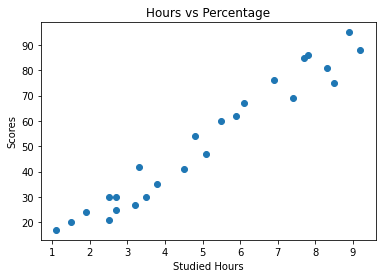

In [ ]:
#Hours Vs Percentage of Scores
plt.scatter(dataset['Hours'], dataset['Scores'])
plt.title('Hours vs Percentage')
plt.xlabel('Studied Hours')
plt.ylabel('Scores')
plt.show()

**From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.**

### **Train-Test Split**

The next step is to divide the data into "attributes" (inputs) and "labels" (outputs).

In [ ]:
#X will take all the values except for the last column which is our dependent variable (target variable)
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

Now that we have our attributes and labels, the next step is to split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method:

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

### **Training the Algorithm**
We have split our data into training and testing sets, and now is finally the time to train our algorithm. 

In [ ]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("Training complete.")

Training complete.


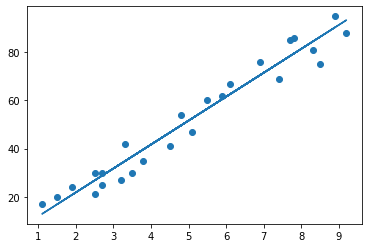

In [ ]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

### **Making Predictions**
Now that we have trained our algorithm, it's time to make some predictions.

In [ ]:
y_pred = regressor.predict(X_test)
print(y_pred)

[16.84472176 33.74557494 75.50062397 26.7864001  60.58810646 39.71058194
 20.8213931 ]


In [ ]:
#Comparing the actual values with the predicted ones.
dataset = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
dataset

,Actual,Predicted
0,20,16.844722
1,27,33.745575
2,69,75.500624
3,30,26.786400
4,62,60.588106
5,35,39.710582
6,24,20.821393


# **Visualization of results**

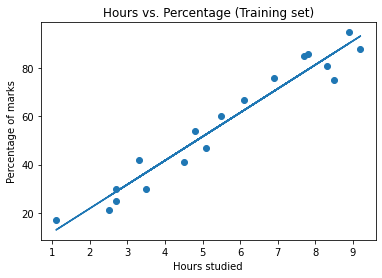

In [ ]:
#Visualising the Training set results
plt.scatter(X_train, y_train)
plt.plot(X_train, regressor.predict(X_train))
plt.title('Hours vs. Percentage (Training set)')
plt.xlabel('Hours studied')
plt.ylabel('Percentage of marks')
plt.show()

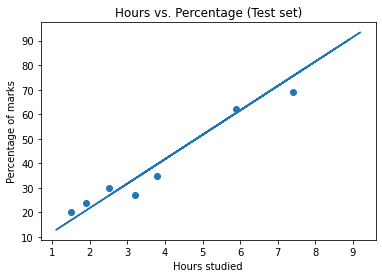

In [ ]:
#Visualising the Test set results
plt.scatter(X_test, y_test)
plt.plot(X_train, regressor.predict(X_train))
plt.title('Hours vs. Percentage (Test set)')
plt.xlabel('Hours studied')
plt.ylabel('Percentage of marks')
plt.show()

# Predicting the score 

In [ ]:
#predicting the score 
dataset = np.array(9.25)
dataset = dataset.reshape(-1, 1)
pred = regressor.predict(dataset)
print("If the student studies for 9.25 hours/day, the score is {}.".format(pred))

If the student studies for 9.25 hours/day, the score is [93.89272889].


### **Evaluating the model**

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.

In [ ]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.130879918502482


#Conclusion:
We used a Linear Regression Model to predict the percentage of an student based on the no. of study hours.